# Milestone 2 - Second Model I

In [11]:
# imports 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from scripts import *
from second_scripts import *


### I. Data Prepration

In [2]:
# Read the data
# data_path = './data'
data_path = './DLCV_SS25_Dataset'  
images, labels = data_reader2(data_path)


In [3]:
num_classes = len(os.listdir(data_path))
num_classes

5

In [4]:
len(images)

2351

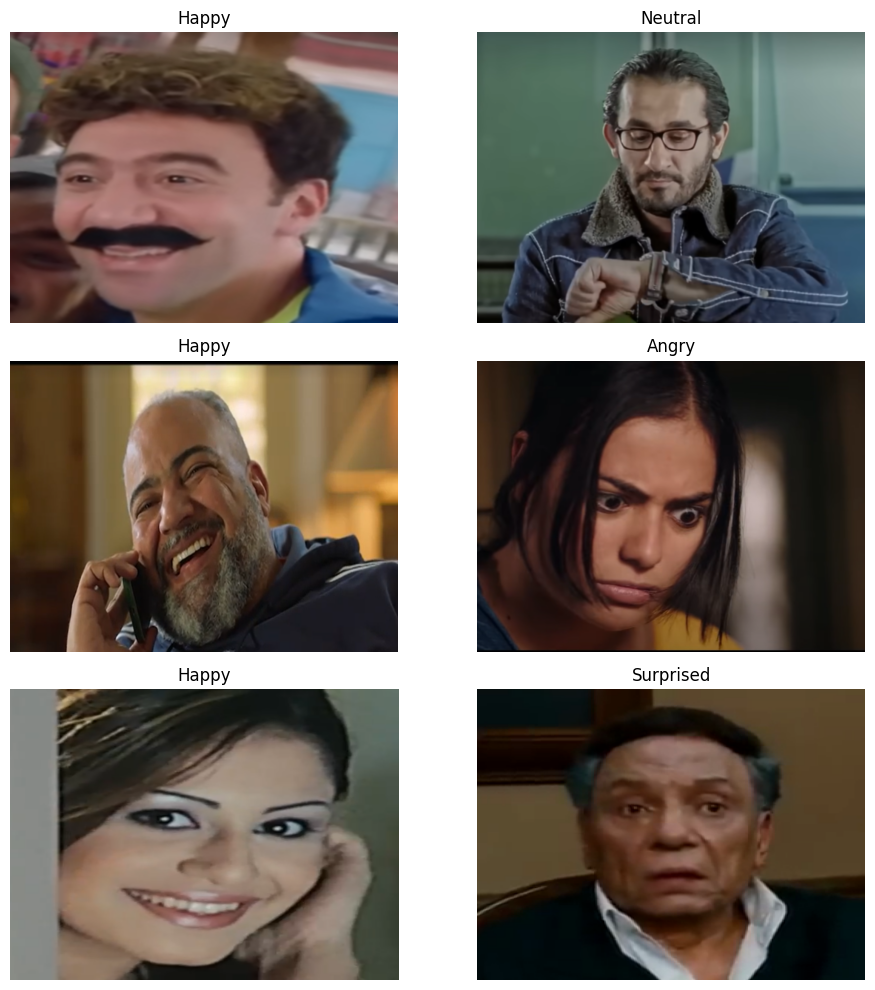

In [5]:
# View 4 random images and their titles
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(images))
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Preprocess the images 
train_tuple, val_tuple, test_tuple, label_to_index = data_preperator2((images, labels))
index_to_label = {v: k for k, v in label_to_index.items()}

train_data, train_labels = train_tuple
val_data, val_labels = val_tuple
test_data, test_labels = test_tuple

train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

((1645, 512, 512, 3),
 (1645,),
 (470, 512, 512, 3),
 (470,),
 (236, 512, 512, 3),
 (236,))

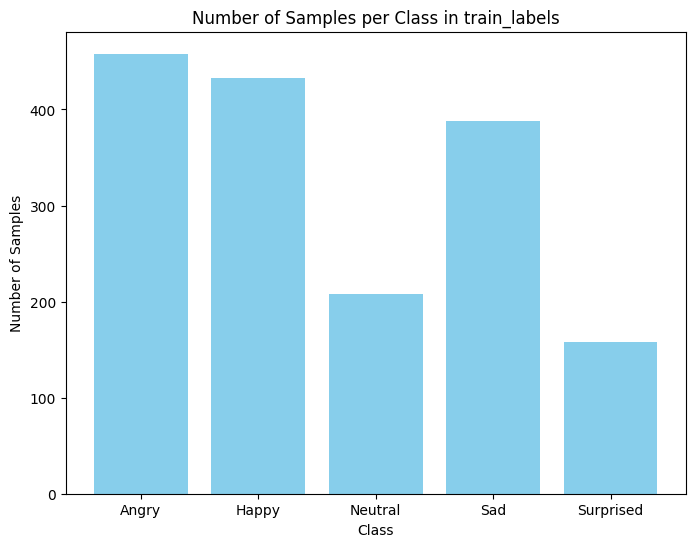

In [7]:
draw_barchart_labels(train_labels, label_to_index)

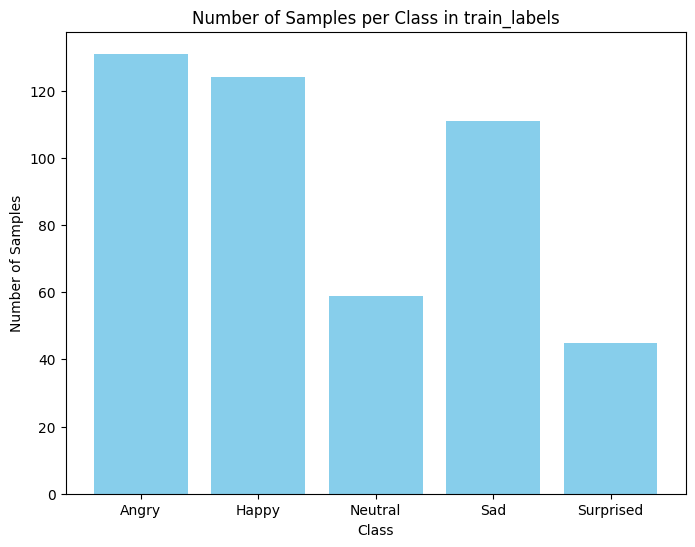

In [8]:
draw_barchart_labels(val_labels, label_to_index)

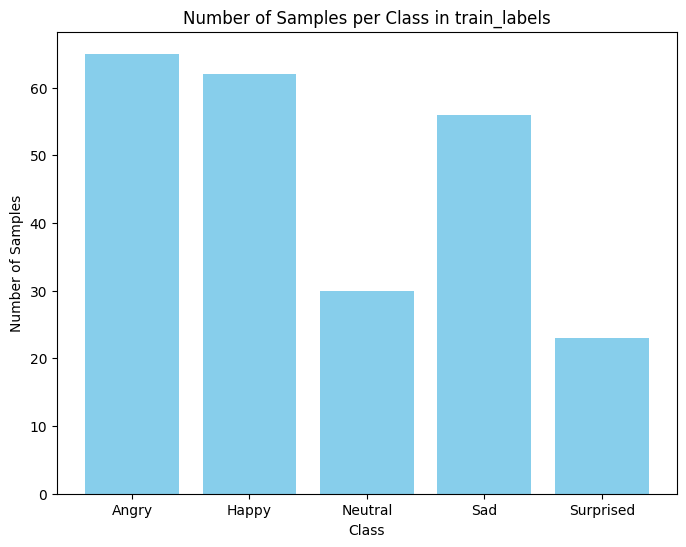

In [9]:
draw_barchart_labels(test_labels, label_to_index)

### II. Second Model (Old model)

In [10]:
train_loader = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, shuffle=True)
val_loader = convert_to_dataloader(data=(val_data, val_labels), batch_size=32, shuffle=False)
test_loader = convert_to_dataloader(data=(test_data, test_labels), batch_size=32, shuffle=False)

In [ ]:
# Test second_model is working
second_model = SecondModel()

example_image = torch.tensor(train_data[0], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

output = second_model(example_image)

print("Output shape:", output.shape)
print("Output:", output)



Output shape: torch.Size([1, 5])
Output: tensor([[ 0.0559,  0.1055,  0.0545,  0.5112, -0.0355]],
       grad_fn=<AddmmBackward0>)


In [ ]:
summary(second_model, input_size=(3, 512, 512), batch_size=1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 32, 510, 510]             896
              ReLU-2          [1, 32, 510, 510]               0
         MaxPool2d-3          [1, 32, 255, 255]               0
       BatchNorm2d-4          [1, 32, 255, 255]              64
            Conv2d-5          [1, 64, 253, 253]          18,496
              ReLU-6          [1, 64, 253, 253]               0
         MaxPool2d-7          [1, 64, 126, 126]               0
       BatchNorm2d-8          [1, 64, 126, 126]             128
            Conv2d-9          [1, 64, 124, 124]          36,928
             ReLU-10          [1, 64, 124, 124]               0
        MaxPool2d-11            [1, 64, 62, 62]               0
      BatchNorm2d-12            [1, 64, 62, 62]             128
           Conv2d-13            [1, 32, 58, 58]          51,232
             ReLU-14            [1, 32,

In [ ]:
model = SecondModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
num_epochs = 20

train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20]
train_loss: 0.0481, train_acc: 0.3252


val_Loss: 1.5113  val_Acc: 0.3383  val_Prec: 0.2722  val_Rec: 0.2993  val_F1: 0.2803  val_ROC-AUC: 0.6029
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0458, train_acc: 0.3805


val_Loss: 1.4754  val_Acc: 0.3426  val_Prec: 0.2823  val_Rec: 0.2733  val_F1: 0.2486  val_ROC-AUC: 0.6358
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0441, train_acc: 0.4188


val_Loss: 1.5306  val_Acc: 0.3468  val_Prec: 0.2506  val_Rec: 0.2604  val_F1: 0.1981  val_ROC-AUC: 0.6293
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0428, train_acc: 0.4377


val_Loss: 1.3903  val_Acc: 0.4170  val_Prec: 0.3373  val_Rec: 0.3385  val_F1: 0.3228  val_ROC-AUC: 0.7071
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0408, train_acc: 0.4766


val_Loss: 1.3687  val_Acc: 0.4149  val_Prec: 0.4561  val_Rec: 0.3296  val_F1: 0.3097  val_ROC-AUC: 0.7130
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0389, train_acc: 0.5027


val_Loss: 1.4405  val_Acc: 0.3915  val_Prec: 0.3060  val_Rec: 0.3070  val_F1: 0.2797  val_ROC-AUC: 0.6948
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0380, train_acc: 0.5191


val_Loss: 1.3607  val_Acc: 0.4191  val_Prec: 0.3871  val_Rec: 0.3417  val_F1: 0.3363  val_ROC-AUC: 0.7119
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0360, train_acc: 0.5483


val_Loss: 1.3679  val_Acc: 0.4213  val_Prec: 0.4157  val_Rec: 0.3315  val_F1: 0.3107  val_ROC-AUC: 0.7154
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0338, train_acc: 0.5799


val_Loss: 1.3770  val_Acc: 0.4170  val_Prec: 0.3792  val_Rec: 0.3546  val_F1: 0.3479  val_ROC-AUC: 0.7159
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0315, train_acc: 0.6170


val_Loss: 1.3481  val_Acc: 0.4213  val_Prec: 0.3733  val_Rec: 0.3475  val_F1: 0.3411  val_ROC-AUC: 0.7297
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0292, train_acc: 0.6681


val_Loss: 1.3617  val_Acc: 0.4426  val_Prec: 0.4008  val_Rec: 0.3782  val_F1: 0.3794  val_ROC-AUC: 0.7235
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0268, train_acc: 0.6924


val_Loss: 1.3291  val_Acc: 0.4489  val_Prec: 0.4348  val_Rec: 0.3927  val_F1: 0.4004  val_ROC-AUC: 0.7431
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0246, train_acc: 0.7398


val_Loss: 1.3785  val_Acc: 0.4553  val_Prec: 0.4397  val_Rec: 0.3895  val_F1: 0.3936  val_ROC-AUC: 0.7275
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0217, train_acc: 0.7781


val_Loss: 1.3549  val_Acc: 0.4809  val_Prec: 0.4810  val_Rec: 0.4222  val_F1: 0.4341  val_ROC-AUC: 0.7404
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0190, train_acc: 0.8225


val_Loss: 1.4078  val_Acc: 0.4553  val_Prec: 0.4161  val_Rec: 0.3928  val_F1: 0.3936  val_ROC-AUC: 0.7332
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0163, train_acc: 0.8590


val_Loss: 1.4306  val_Acc: 0.4426  val_Prec: 0.4115  val_Rec: 0.3920  val_F1: 0.3948  val_ROC-AUC: 0.7401
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0137, train_acc: 0.8942


val_Loss: 1.4917  val_Acc: 0.4660  val_Prec: 0.4558  val_Rec: 0.3968  val_F1: 0.4012  val_ROC-AUC: 0.7264
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0116, train_acc: 0.9252


val_Loss: 1.5404  val_Acc: 0.4617  val_Prec: 0.4414  val_Rec: 0.4051  val_F1: 0.4125  val_ROC-AUC: 0.7215
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0103, train_acc: 0.9264


val_Loss: 1.5470  val_Acc: 0.4702  val_Prec: 0.4329  val_Rec: 0.4177  val_F1: 0.4217  val_ROC-AUC: 0.7287
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0082, train_acc: 0.9581


val_Loss: 1.5539  val_Acc: 0.4681  val_Prec: 0.4391  val_Rec: 0.4224  val_F1: 0.4245  val_ROC-AUC: 0.7400
--------------------------------------------------


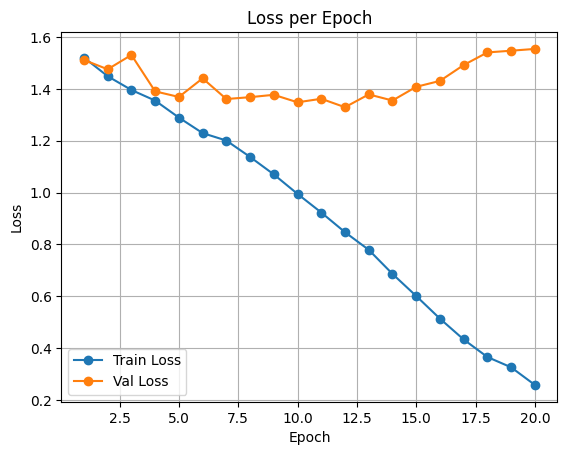

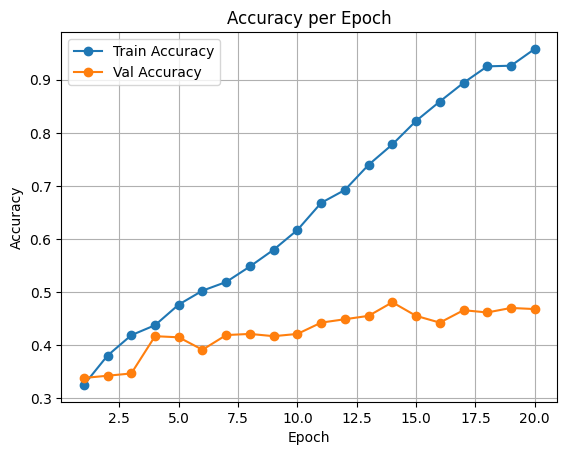

In [ ]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [ ]:
criterion = torch.nn.CrossEntropyLoss()
test_metrics = evaluate(model, test_loader, criterion, prefix='test_')

test_Loss: 1.5630  test_Acc: 0.4534  test_Prec: 0.4018  test_Rec: 0.4013  test_F1: 0.3945  test_ROC-AUC: 0.7506


In [11]:
model_path = "./models/second_model.pkl"

In [ ]:
save_model(model, model_path)

In [13]:
model = load_model(model_path)

In [19]:
images, trues, preds = predict(model, test_loader)

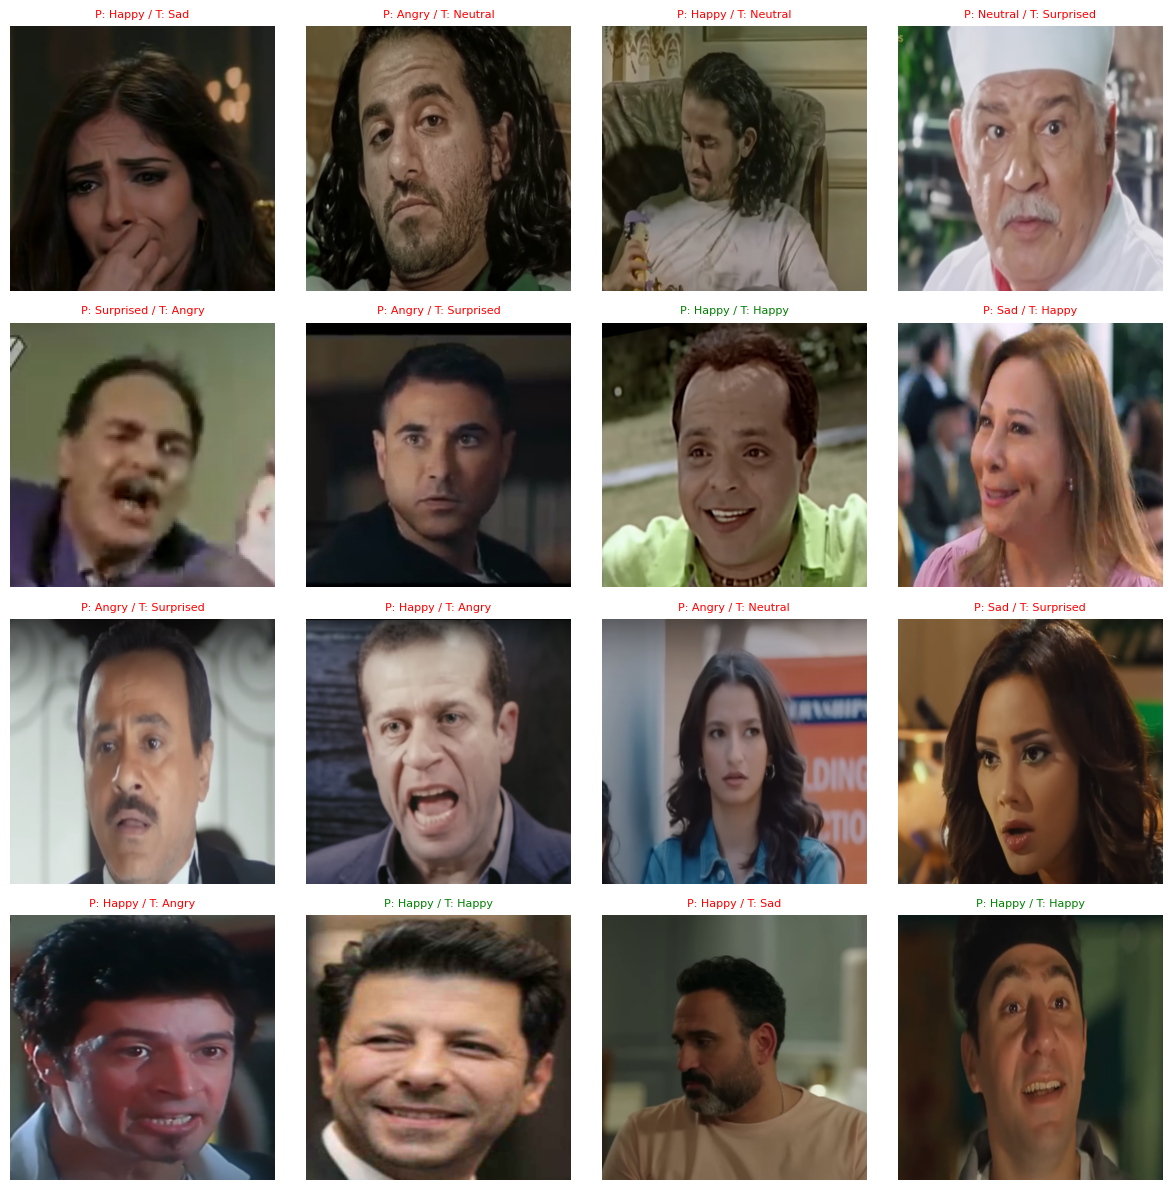

In [20]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4)

#### Using augmentation

In [ ]:
# train_loader_augmented = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, use_aug=True)

# index_to_label = {v: k for k, v in label_to_index.items()}
# i = 0
# for im, label in train_loader_augmented:
#     print(im.shape, label.shape)
#     # Display the first image and its label
#     plt.imshow(im[0].permute(1, 2, 0).numpy())
#     plt.title(index_to_label[label[0].item()])
#     plt.axis('off')
#     plt.show()
#     if i==10:
#         break
#     i+=1

In [11]:
train_loader_augmented = convert_to_dataloader_optimized(data=(train_data, train_labels), batch_size=32, use_aug=True)

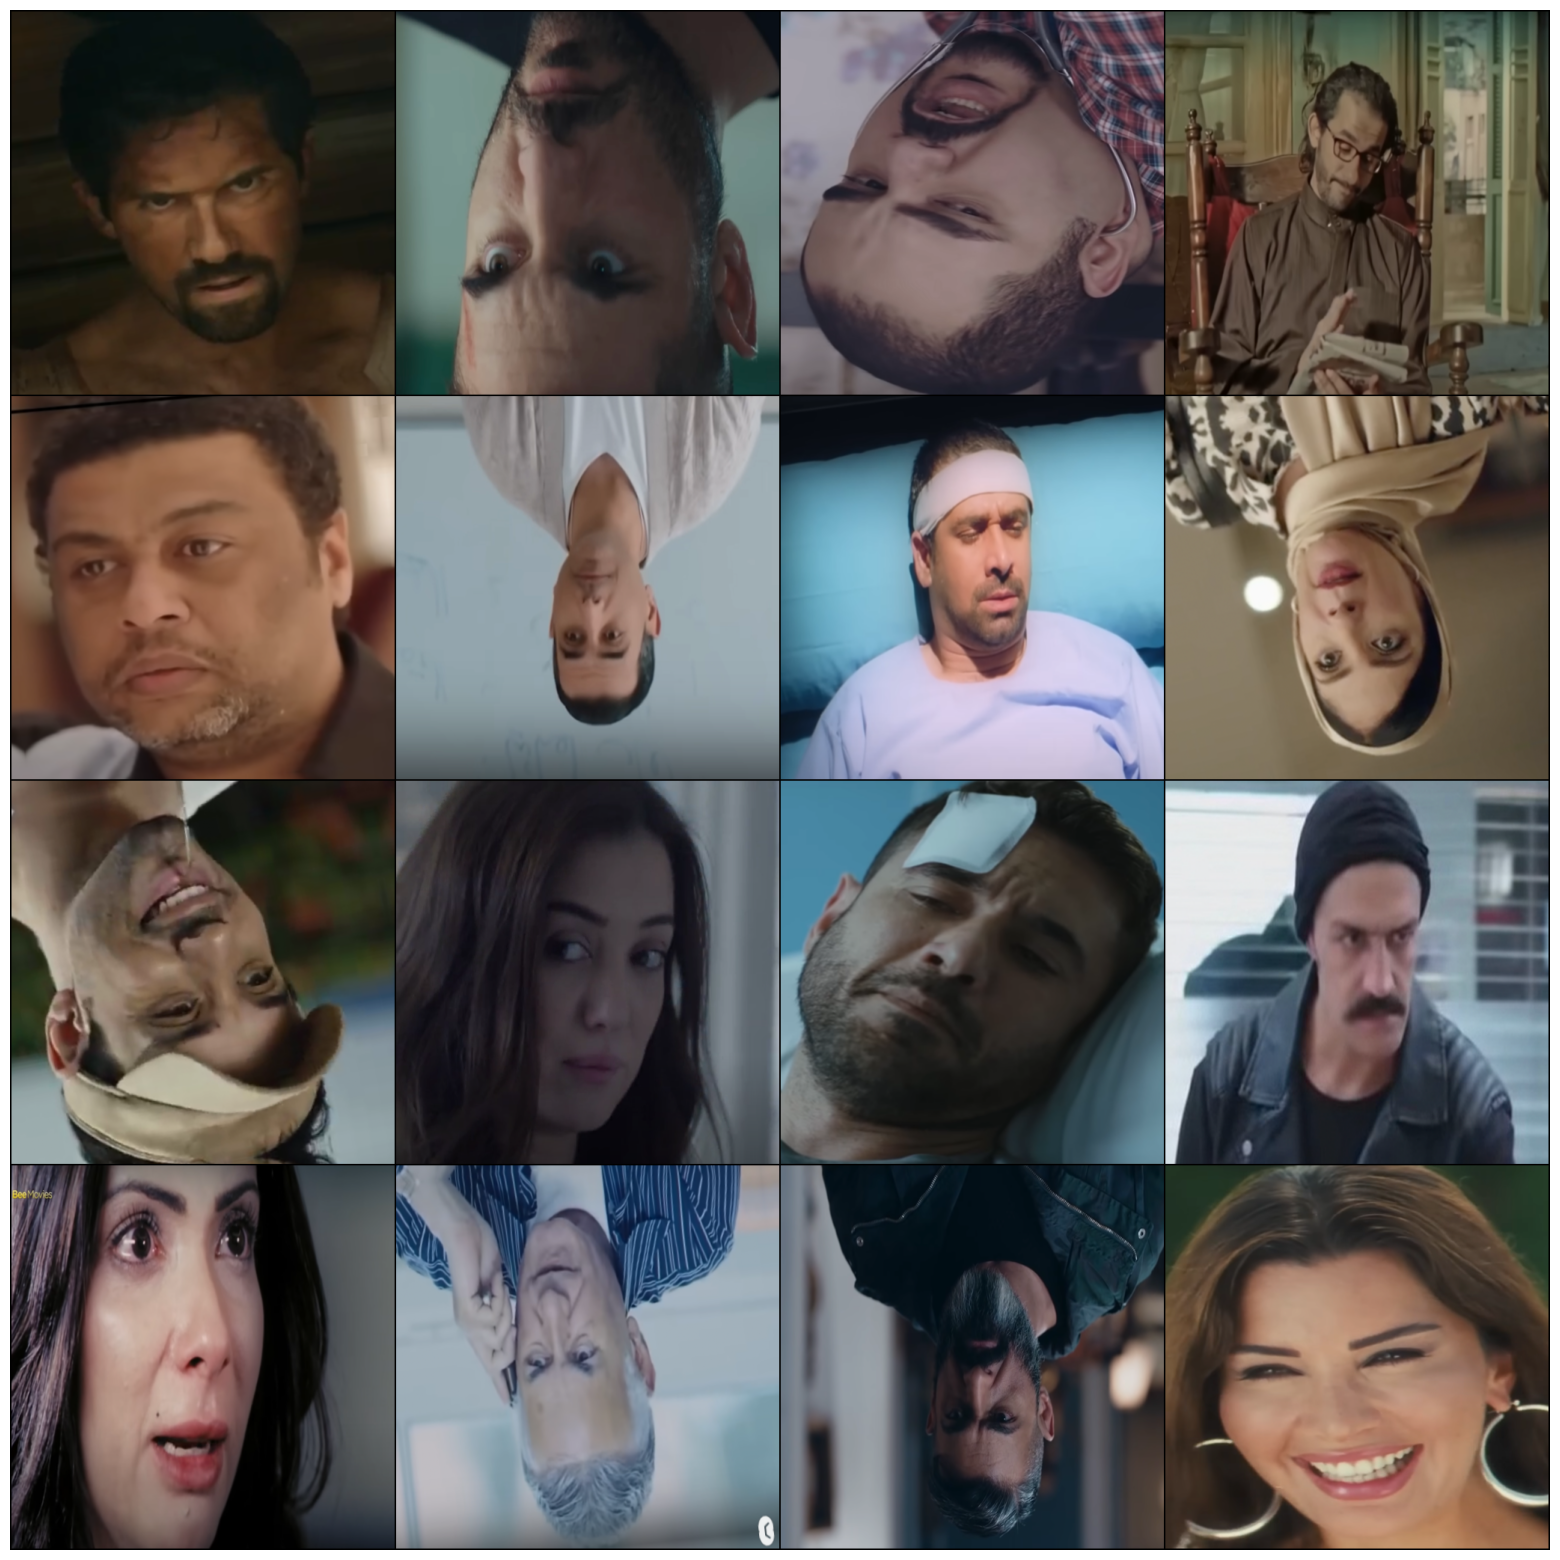

In [12]:
from torchvision.utils import make_grid

images, labels = next(iter(train_loader_augmented))  # shape: [16, 3, 512, 512]

grid = make_grid(images[:16], nrow=4, padding=2)     # → [3, Hg, Wg]

grid_np = grid.permute(1, 2, 0).cpu().numpy()        # → (Hg, Wg, 3)
plt.figure(figsize=(20,20))
plt.imshow(grid_np)
plt.axis('off')
plt.show()


In [13]:
model = SecondModel()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20

train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader_augmented, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20]
train_loss: 0.0481, train_acc: 0.3337


val_Loss: 1.5459  val_Acc: 0.2979  val_Prec: 0.2719  val_Rec: 0.2474  val_F1: 0.2005  val_ROC-AUC: 0.5964
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0465, train_acc: 0.3562


val_Loss: 1.4540  val_Acc: 0.3681  val_Prec: 0.2892  val_Rec: 0.2942  val_F1: 0.2771  val_ROC-AUC: 0.6479
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0455, train_acc: 0.3720


val_Loss: 1.5444  val_Acc: 0.3404  val_Prec: 0.2218  val_Rec: 0.2545  val_F1: 0.1888  val_ROC-AUC: 0.6103
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0448, train_acc: 0.3854


val_Loss: 1.4225  val_Acc: 0.4064  val_Prec: 0.3242  val_Rec: 0.3308  val_F1: 0.3162  val_ROC-AUC: 0.6788
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0440, train_acc: 0.3933


val_Loss: 1.4683  val_Acc: 0.3638  val_Prec: 0.3052  val_Rec: 0.2795  val_F1: 0.2432  val_ROC-AUC: 0.6438
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0437, train_acc: 0.3897


val_Loss: 1.4216  val_Acc: 0.3872  val_Prec: 0.4280  val_Rec: 0.2964  val_F1: 0.2646  val_ROC-AUC: 0.6719
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0428, train_acc: 0.4274


val_Loss: 1.4402  val_Acc: 0.3702  val_Prec: 0.2648  val_Rec: 0.2884  val_F1: 0.2645  val_ROC-AUC: 0.6600
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0425, train_acc: 0.4188


val_Loss: 1.3821  val_Acc: 0.3979  val_Prec: 0.3597  val_Rec: 0.3181  val_F1: 0.3027  val_ROC-AUC: 0.7184
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0417, train_acc: 0.4365


val_Loss: 1.3832  val_Acc: 0.3787  val_Prec: 0.2899  val_Rec: 0.2882  val_F1: 0.2539  val_ROC-AUC: 0.7036
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0405, train_acc: 0.4547


val_Loss: 1.3534  val_Acc: 0.4000  val_Prec: 0.3210  val_Rec: 0.3415  val_F1: 0.3263  val_ROC-AUC: 0.7228
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0403, train_acc: 0.4632


val_Loss: 1.3447  val_Acc: 0.4064  val_Prec: 0.3679  val_Rec: 0.3452  val_F1: 0.3464  val_ROC-AUC: 0.7256
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0397, train_acc: 0.4723


val_Loss: 1.4067  val_Acc: 0.4064  val_Prec: 0.3167  val_Rec: 0.3229  val_F1: 0.2987  val_ROC-AUC: 0.7120
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0386, train_acc: 0.5046


val_Loss: 1.3769  val_Acc: 0.3766  val_Prec: 0.3002  val_Rec: 0.3179  val_F1: 0.3039  val_ROC-AUC: 0.7117
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0380, train_acc: 0.5088


val_Loss: 1.3085  val_Acc: 0.4532  val_Prec: 0.3784  val_Rec: 0.3629  val_F1: 0.3498  val_ROC-AUC: 0.7386
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0372, train_acc: 0.5149


val_Loss: 1.3237  val_Acc: 0.4383  val_Prec: 0.3806  val_Rec: 0.3712  val_F1: 0.3649  val_ROC-AUC: 0.7359
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0368, train_acc: 0.5155


val_Loss: 1.4192  val_Acc: 0.4191  val_Prec: 0.3887  val_Rec: 0.3329  val_F1: 0.2971  val_ROC-AUC: 0.7457
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0361, train_acc: 0.5319


val_Loss: 1.3569  val_Acc: 0.3936  val_Prec: 0.3356  val_Rec: 0.3434  val_F1: 0.3353  val_ROC-AUC: 0.7266
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0350, train_acc: 0.5429


val_Loss: 1.2877  val_Acc: 0.4638  val_Prec: 0.3999  val_Rec: 0.3832  val_F1: 0.3723  val_ROC-AUC: 0.7544
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0346, train_acc: 0.5653


val_Loss: 1.3051  val_Acc: 0.4426  val_Prec: 0.4085  val_Rec: 0.3823  val_F1: 0.3806  val_ROC-AUC: 0.7531
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0336, train_acc: 0.5714


val_Loss: 1.2871  val_Acc: 0.4766  val_Prec: 0.4358  val_Rec: 0.4028  val_F1: 0.4038  val_ROC-AUC: 0.7567
--------------------------------------------------


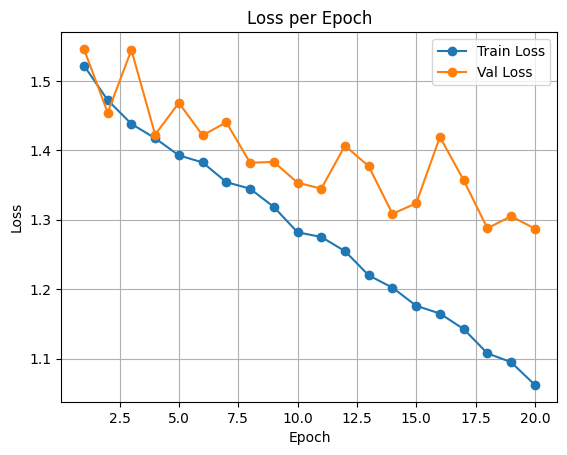

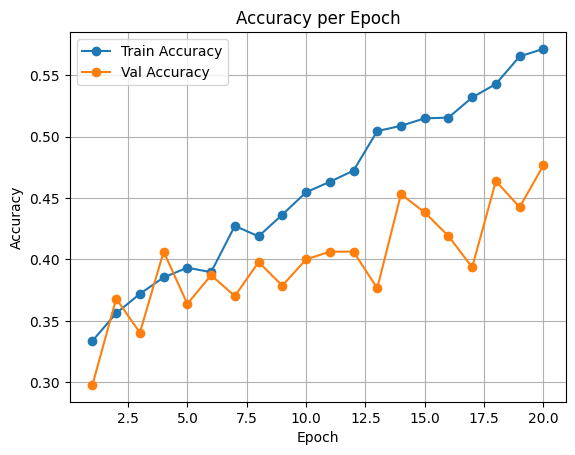

In [14]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [23]:
test_metrics = evaluate(model, test_loader, criterion, prefix='test_')

test_Loss: 1.2727  test_Acc: 0.4703  test_Prec: 0.4896  test_Rec: 0.4276  test_F1: 0.4365  test_ROC-AUC: 0.7773


In [21]:
model_path = "./models/second_model_aug.pkl"

In [17]:
save_model(model, model_path)

In [22]:
model = load_model(model_path)

In [24]:
images, trues, preds = predict(model, test_loader)

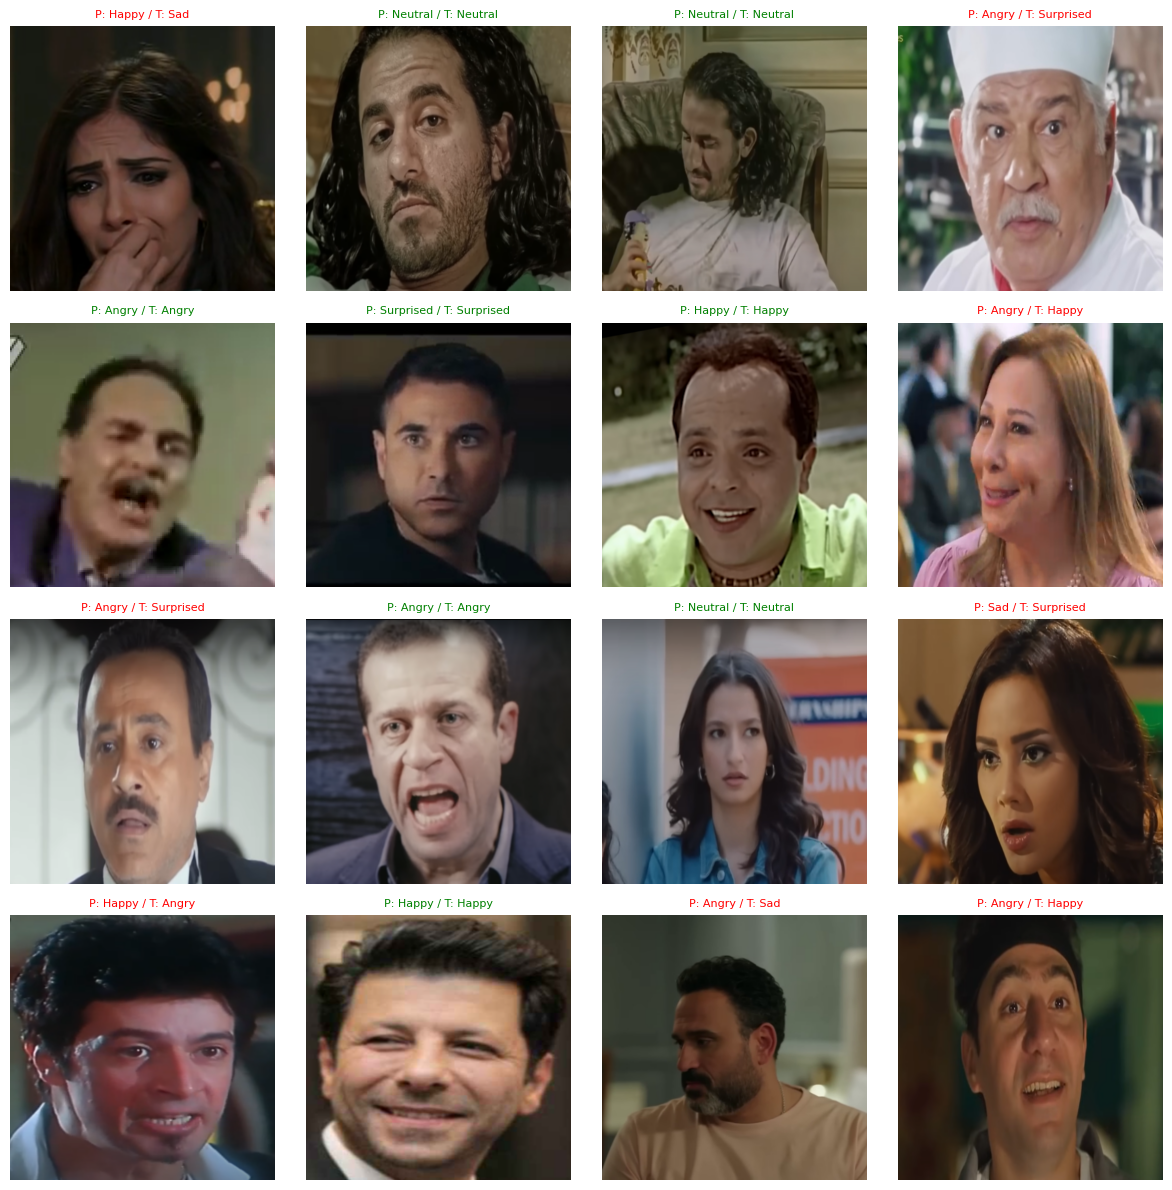

In [25]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4)

### Pretrained Model

#### ResNet18

In [18]:
import torchvision.models as models
from torch import nn
from torchvision import transforms

model = get_pretrained_model(model_name="resnet18", num_classes=5)

# Resize and normalize the images for pretrained models like ResNet
transform = transforms.Compose([
    transforms.ToPILImage(),  
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

train_loader_pretrained = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, transform=transform, shuffle=True)
val_loader_pretrained = convert_to_dataloader(data=(val_data, val_labels), batch_size=32, transform=transform, shuffle=False)
test_loader_pretrained = convert_to_dataloader(data=(test_data, test_labels), batch_size=32, transform=transform, shuffle=False)

c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\001\anaconda3\envs\pytorch-env\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20
train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader_pretrained, val_loader_pretrained, criterion, optimizer, num_epochs)



Epoch [1/20]
train_loss: 0.0490, train_acc: 0.2960


val_Loss: 1.4460  val_Acc: 0.3766  val_Prec: 0.2940  val_Rec: 0.3149  val_F1: 0.3004  val_ROC-AUC: 0.6651
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0424, train_acc: 0.4353


val_Loss: 1.3796  val_Acc: 0.4000  val_Prec: 0.2835  val_Rec: 0.3042  val_F1: 0.2680  val_ROC-AUC: 0.7081
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0395, train_acc: 0.4845


val_Loss: 1.3470  val_Acc: 0.4170  val_Prec: 0.4030  val_Rec: 0.3259  val_F1: 0.3020  val_ROC-AUC: 0.7283
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0375, train_acc: 0.5064


val_Loss: 1.3465  val_Acc: 0.4255  val_Prec: 0.4719  val_Rec: 0.3388  val_F1: 0.3213  val_ROC-AUC: 0.7360
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0362, train_acc: 0.5465


val_Loss: 1.3082  val_Acc: 0.4489  val_Prec: 0.4446  val_Rec: 0.3694  val_F1: 0.3633  val_ROC-AUC: 0.7458
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0353, train_acc: 0.5587


val_Loss: 1.3119  val_Acc: 0.4702  val_Prec: 0.5048  val_Rec: 0.3837  val_F1: 0.3766  val_ROC-AUC: 0.7465
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0343, train_acc: 0.5678


val_Loss: 1.2862  val_Acc: 0.4617  val_Prec: 0.4486  val_Rec: 0.3976  val_F1: 0.4016  val_ROC-AUC: 0.7541
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0331, train_acc: 0.5927


val_Loss: 1.2939  val_Acc: 0.4723  val_Prec: 0.4842  val_Rec: 0.3979  val_F1: 0.4022  val_ROC-AUC: 0.7546
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0333, train_acc: 0.5884


val_Loss: 1.3099  val_Acc: 0.4787  val_Prec: 0.4954  val_Rec: 0.4077  val_F1: 0.4056  val_ROC-AUC: 0.7557
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0322, train_acc: 0.6109


val_Loss: 1.2915  val_Acc: 0.4660  val_Prec: 0.4562  val_Rec: 0.3945  val_F1: 0.3981  val_ROC-AUC: 0.7594
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0314, train_acc: 0.6237


val_Loss: 1.3148  val_Acc: 0.4511  val_Prec: 0.4316  val_Rec: 0.4275  val_F1: 0.4139  val_ROC-AUC: 0.7602
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0311, train_acc: 0.6255


val_Loss: 1.2875  val_Acc: 0.4809  val_Prec: 0.4803  val_Rec: 0.4224  val_F1: 0.4304  val_ROC-AUC: 0.7609
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0313, train_acc: 0.6261


val_Loss: 1.3183  val_Acc: 0.4511  val_Prec: 0.4304  val_Rec: 0.4242  val_F1: 0.4151  val_ROC-AUC: 0.7629
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0307, train_acc: 0.6249


val_Loss: 1.2895  val_Acc: 0.4723  val_Prec: 0.4384  val_Rec: 0.4417  val_F1: 0.4386  val_ROC-AUC: 0.7648
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0300, train_acc: 0.6347


val_Loss: 1.2767  val_Acc: 0.4894  val_Prec: 0.4609  val_Rec: 0.4261  val_F1: 0.4310  val_ROC-AUC: 0.7649
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0297, train_acc: 0.6407


val_Loss: 1.3124  val_Acc: 0.4723  val_Prec: 0.4843  val_Rec: 0.4100  val_F1: 0.4143  val_ROC-AUC: 0.7599
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0294, train_acc: 0.6492


val_Loss: 1.2887  val_Acc: 0.4766  val_Prec: 0.4398  val_Rec: 0.4401  val_F1: 0.4392  val_ROC-AUC: 0.7654
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0295, train_acc: 0.6401


val_Loss: 1.3271  val_Acc: 0.4681  val_Prec: 0.4515  val_Rec: 0.4412  val_F1: 0.4413  val_ROC-AUC: 0.7604
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0291, train_acc: 0.6578


val_Loss: 1.3421  val_Acc: 0.4872  val_Prec: 0.5386  val_Rec: 0.4296  val_F1: 0.4386  val_ROC-AUC: 0.7590
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0286, train_acc: 0.6608


val_Loss: 1.3064  val_Acc: 0.4745  val_Prec: 0.4419  val_Rec: 0.4487  val_F1: 0.4442  val_ROC-AUC: 0.7639
--------------------------------------------------


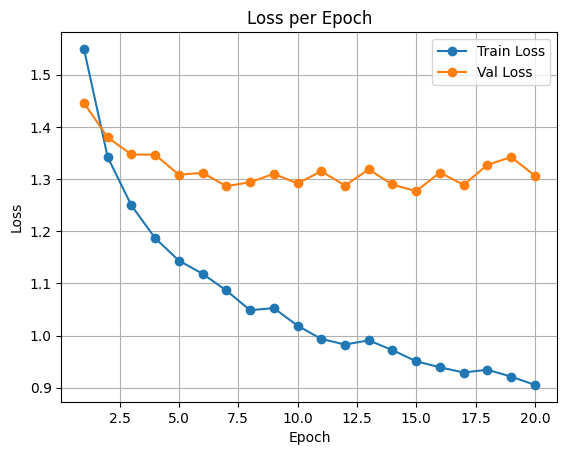

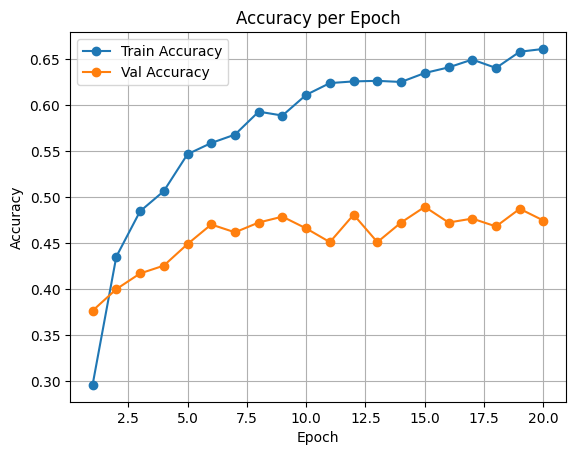

In [20]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [21]:
test_metrics = evaluate(model, test_loader_pretrained, criterion, prefix='test_')

test_Loss: 1.3358  test_Acc: 0.4831  test_Prec: 0.4632  test_Rec: 0.4889  test_F1: 0.4677  test_ROC-AUC: 0.7756


In [22]:
model_path = "./models/resnet18.pkl"

In [23]:
save_model(model, model_path)

In [28]:
model = load_model(model_path)

In [24]:
images, trues, preds = predict(model, test_loader_pretrained)

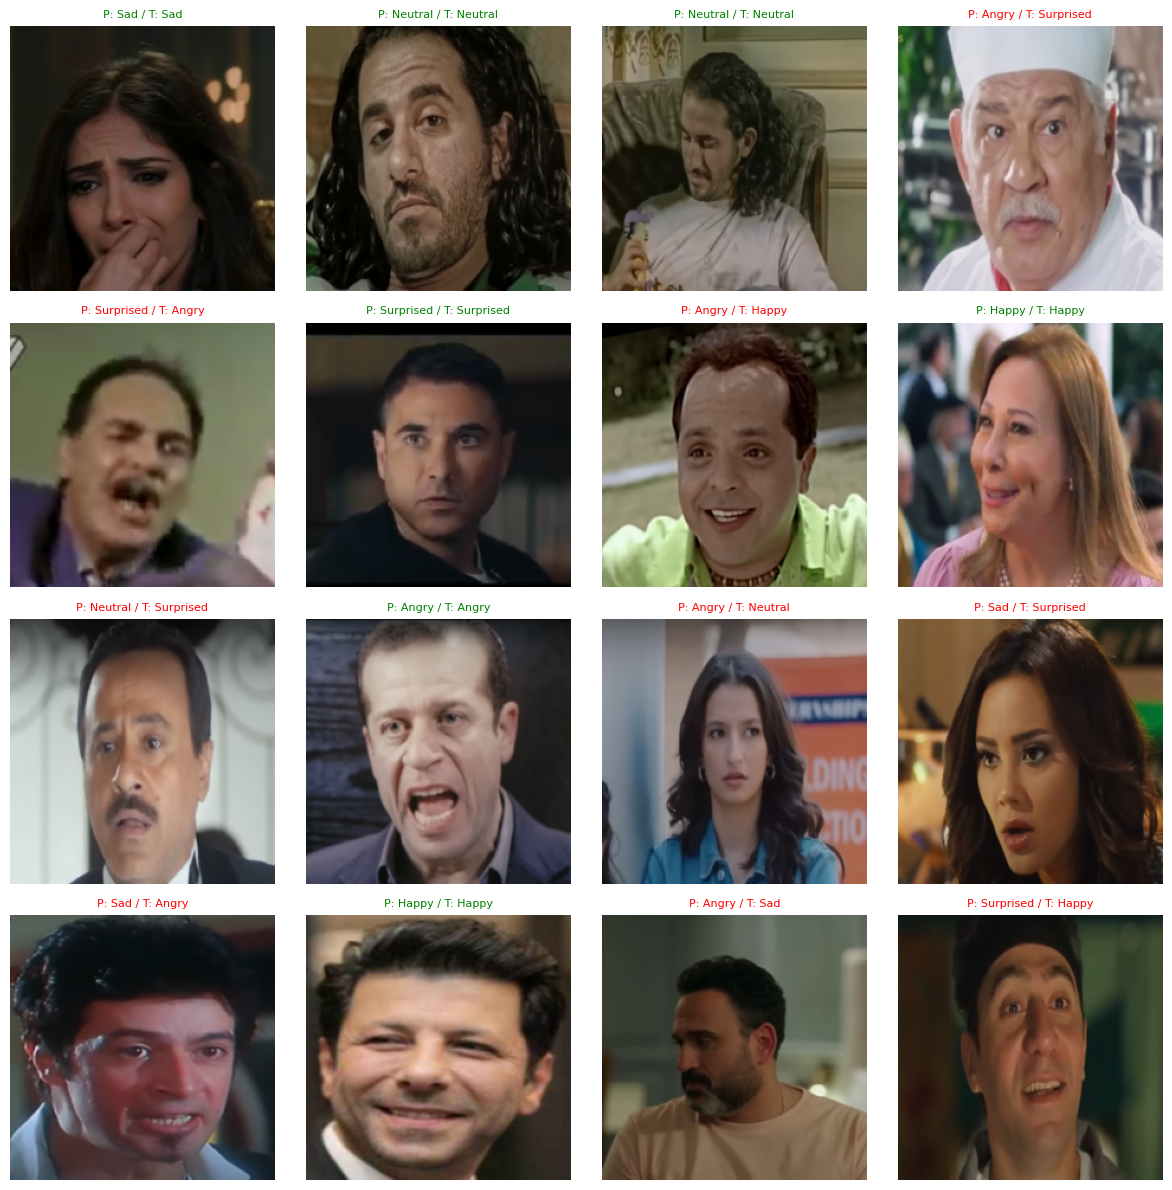

In [25]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])